In [10]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms
from MDAnalysis.tests.datafiles import PSF, DCD

import matplotlib.pyplot as plt

In [2]:
# Load the protein structure and trajectory
u = mda.Universe(PSF, DCD)

# Print information about the dataset
print(f"Number of atoms: {len(u.atoms)}")
print(f"Number of frames: {len(u.trajectory)}")

Number of atoms: 3341
Number of frames: 98


/Users/garyshincc/garyshin/cpbio_env/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
# Select the backbone atoms of the protein
backbone = u.select_atoms("backbone")

ref = u.select_atoms("backbone")

# Print selected atoms
print(backbone)
print(f"Number of atoms in trajectory selection: {len(backbone)}")
print(f"Number of atoms in reference selection: {len(ref)}")


<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>, <Atom 18: C of type 20 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3334: N of type 54 of resname GLY, resid 214 and segid 4AKE>, <Atom 3336: CA of type 23 of resname GLY, resid 214 and segid 4AKE>, <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>]>
Number of atoms in trajectory selection: 855
Number of atoms in reference selection: 855


In [5]:
# Initialize RMSD calculation
rmsd = rms.RMSD(u, 
                backbone,  # Atoms to analyze
                select="backbone", 
                ref_frame=0)  # Reference frame is the first frame
rmsd.run()  # Run the calculation

# Extract RMSD values
rmsd_values = rmsd.rmsd  # Columns: [frame, time (ps), RMSD (Å)]

# Print first few RMSD results
print(rmsd_values[:5])

[[0.00000000e+00 9.99999912e-01 5.83434382e-07]
 [1.00000000e+00 1.99999982e+00 4.63659217e-01]
 [2.00000000e+00 2.99999974e+00 6.41933990e-01]
 [3.00000000e+00 3.99999965e+00 7.74398332e-01]
 [4.00000000e+00 4.99999956e+00 8.58860023e-01]]


/Users/garyshincc/garyshin/cpbio_env/lib/python3.11/site-packages/MDAnalysis/analysis/rms.py:734: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)


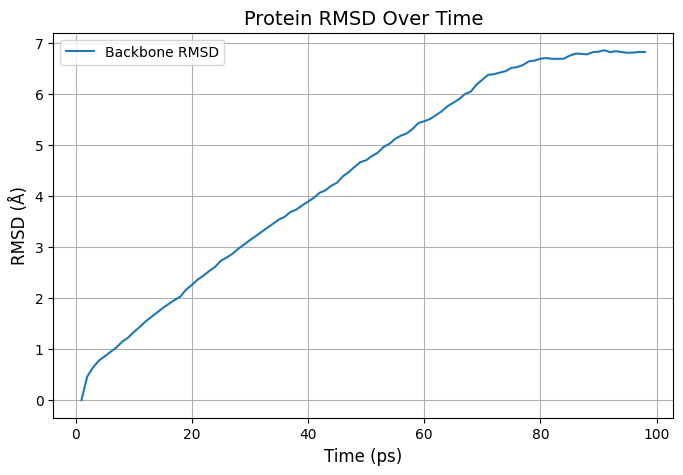

In [6]:
# Plot RMSD
plt.figure(figsize=(8, 5))
plt.plot(rmsd_values[:, 1], rmsd_values[:, 2], label="Backbone RMSD")
plt.xlabel("Time (ps)", fontsize=12)
plt.ylabel("RMSD (Å)", fontsize=12)
plt.title("Protein RMSD Over Time", fontsize=14)
plt.legend()
plt.grid()
plt.show()